# KÉPÉLESÍTÉS
## *“Super resolution” algoritmus használata*


> A képek élesítése és nagyítása egy megszokott jelenet ma már számos filmben. Ezt próbálom imitálni “szuper felbontás" algoritmus használatával kép élesítésével és esetleges nagyításával ahol szükséges.


Burian Sándor, AWXYHE ~ Számítógépes képfeldolgozás és grafika (NIXSKGHMNE)

Óbudai Egyetem, Neumann János Informatikai kar - *2020-2021, második félév*




---



A megvalósítást Xintao Wang és mások, [*ESRGAN: Enhanced Super-ResolutionGenerative Adversarial Networks*](https://arxiv.org/pdf/1809.00219.pdf) leírása alapján készült Adrish Dey által összefoglalt [*Image Super Resolution using ESRGAN*](https://www.tensorflow.org/hub/tutorials/image_enhancing) című TensorFlow útmutatás alapján készítettem el.

In [20]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"
print("SZÜKSÉGES FÁJLOK IMPORTÁLVA");

SZÜKSÉGES FÁJLOK IMPORTÁLVA


In [21]:
!wget "https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png" -O original.png #mintafájl
print("KÉP BETÖLTVE");

--2021-05-10 12:24:07--  https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34146 (33K) [image/png]
Saving to: ‘original.png’

original.png        100%[===================>]  33.35K  --.-KB/s    in 0.002s  

2021-05-10 12:24:07 (18.0 MB/s) - ‘original.png’ saved [34146/34146]

KÉP BETÖLTVE


In [22]:
# feldolgozandó fájl beállítása
IMAGE_PATH = "original.png" # ha kicseréljük az éerétket egy általunk hozzáadottra úgy a sajátunkat dolgozhatjuk fel
#IMAGE_PATH = "Bp-part.png"
print("KÉP ÚTVONAL BETÖLTVE");

#Használt model beállítása
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
print("MODEL BETÖLTVE");

KÉP ÚTVONAL BETÖLTVE
MODEL BETÖLTVE


In [23]:
# SEGÉDFÜGGVÉNYEK

def preprocess_image(image_path): #kép előfeldolgozása, mivel csak három csatornás kép támogatott
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))

  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):#kép mentése
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [24]:
hr_image = preprocess_image(IMAGE_PATH)

Saved as eredeti.jpg


Text(0.5, 1.0, 'eredeti')

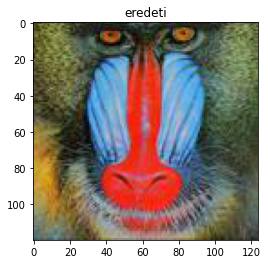

In [25]:
save_image(tf.squeeze(hr_image), filename="eredeti")#eredeti kép mentése
img = mpimg.imread('eredeti.jpg')#kép betöltése

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
imageplot = plt.imshow(img)
ax.set_title("eredeti")

In [26]:
model = hub.load(SAVED_MODEL_PATH) #alkalmazott tanítási modell betöltése

In [27]:
start = time.time()
superResImage = model(hr_image)
superResImage = tf.squeeze(superResImage)
print("Futási idő: %f" % (time.time() - start))

Futási idő: 3.949261


Saved as superRes.jpg


Text(0.5, 1.0, 'Super Resolution')

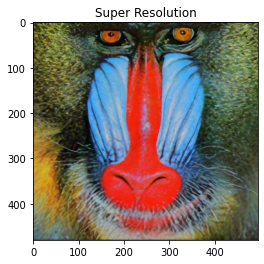

In [28]:
# kép mentése
save_image(tf.squeeze(superResImage), filename="superRes")
img = mpimg.imread('superRes.jpg')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
imageplot = plt.imshow(img)
ax.set_title("Super Resolution")

In [29]:
#mentett képek betöltése
eredetiImg = mpimg.imread('eredeti.jpg')
srImg = mpimg.imread('superRes.jpg')

**Összehasonlítva az eredeti és a super resolution használata után**


Text(0.5, 1.0, 'Super Resolution')

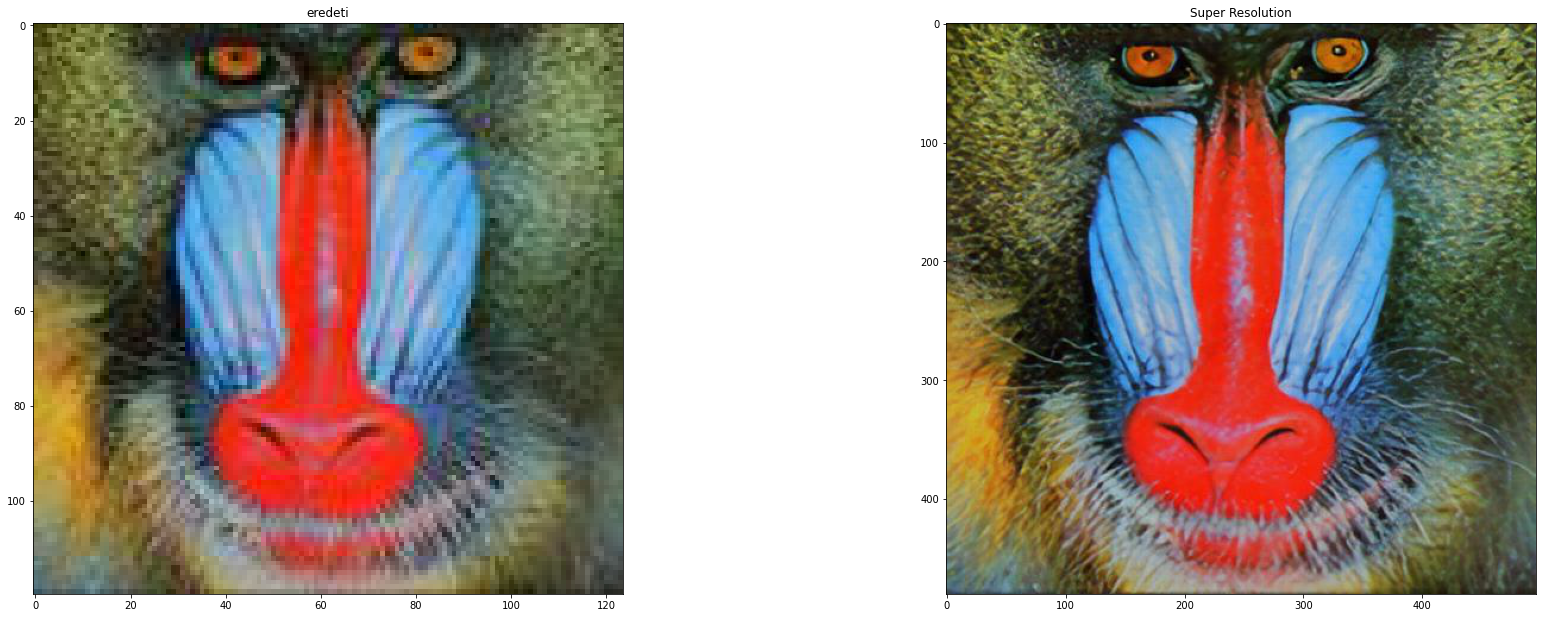

In [30]:
fig = plt.figure()
fig.set_size_inches(30, 10.5)

ax = fig.add_subplot(1,2,1)
imageplot = plt.imshow(eredetiImg)
ax.set_title("eredeti")

ax = fig.add_subplot(1,2,2)
imageplot = plt.imshow(srImg)
ax.set_title("Super Resolution")



---

### Összehasonlítás a hagyományos nagyítási algoritmusokkal, konkrétan bicubic algoritmussal

In [31]:
!wget "https://lh4.googleusercontent.com/-Anmw5df4gj0/AAAAAAAAAAI/AAAAAAAAAAc/6HxU8XFLnQE/photo.jpg64" -O test.jpg #mintafájl
IMAGE_PATH = "test.jpg"
#IMAGE_PATH = "Bp-part.png"

--2021-05-10 12:24:18--  https://lh4.googleusercontent.com/-Anmw5df4gj0/AAAAAAAAAAI/AAAAAAAAAAc/6HxU8XFLnQE/photo.jpg64
Resolving lh4.googleusercontent.com (lh4.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c08::84
Connecting to lh4.googleusercontent.com (lh4.googleusercontent.com)|74.125.20.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84897 (83K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  82.91K  --.-KB/s    in 0.001s  

2021-05-10 12:24:18 (57.0 MB/s) - ‘test.jpg’ saved [84897/84897]



In [32]:
# lebutítás
def downscale_image(image):
  image_size = []
  if len(image.shape) == 3:
    image_size = [image.shape[1], image.shape[0]]
  else:
    raise ValueError("Dimension mismatch. Can work only on single image.")

  image = tf.squeeze(
      tf.cast(
          tf.clip_by_value(image, 0, 255), tf.uint8))

  lr_image = np.asarray(
    Image.fromarray(image.numpy())
    .resize([image_size[0] // 4, image_size[1] // 4],
              Image.BICUBIC))

  lr_image = tf.expand_dims(lr_image, 0)
  lr_image = tf.cast(lr_image, tf.float32)
  return lr_image

In [33]:
hr_image = preprocess_image(IMAGE_PATH)
lr_image = downscale_image(tf.squeeze(hr_image))

In [34]:
start = time.time()
sr_image = model(lr_image)
sr_image = tf.squeeze(sr_image)
print("Futási idő: %f" % (time.time() - start))

Futási idő: 4.368918


In [35]:
#képek mentése
save_image(tf.squeeze(hr_image), filename="eredeti2")
save_image(tf.squeeze(lr_image), filename="bicubic2")
save_image(tf.squeeze(sr_image), filename="superRes2")

#képek betöltése
eredetiImg2 = mpimg.imread('eredeti2.jpg')
bicubic2 = mpimg.imread('bicubic2.jpg')
superRes2 = mpimg.imread('superRes2.jpg')

Saved as eredeti2.jpg
Saved as bicubic2.jpg
Saved as superRes2.jpg


Text(0.5, 1.0, 'Super Resolution')

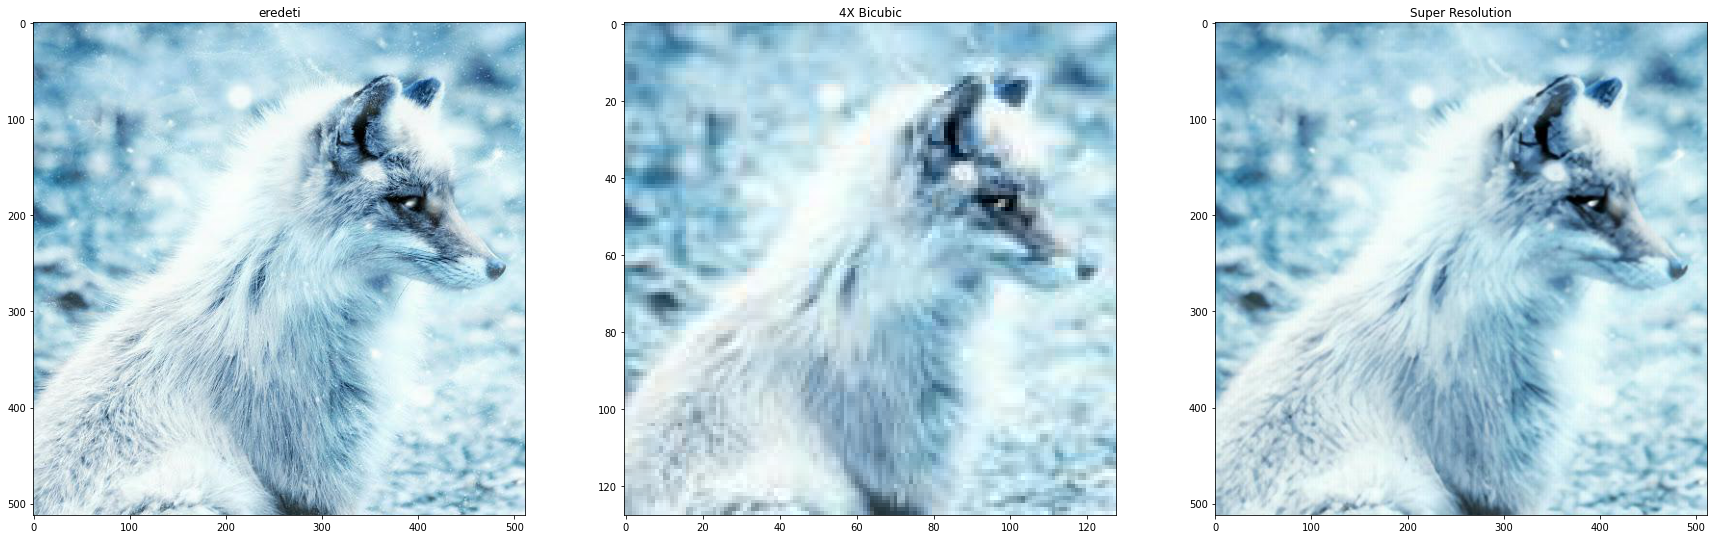

In [36]:
#képek összehasonlítása
fig = plt.figure()
fig.set_size_inches(30, 10.5)
ax = fig.add_subplot(1,3,1)
imageplot = plt.imshow(eredetiImg2)
ax.set_title("eredeti")

ax = fig.add_subplot(1,3,2)
imageplot = plt.imshow(bicubic2)
ax.set_title("4X Bicubic")

ax = fig.add_subplot(1,3,3)
imageplot = plt.imshow(superRes2)
ax.set_title("Super Resolution")



---
### Saját fájlok teszteléséhez


Saved as eredetiTEST.jpg
Saved as bicubicTEST.jpg
Saved as superResTEST.jpg


Text(0.5, 1.0, 'Super Resolution')

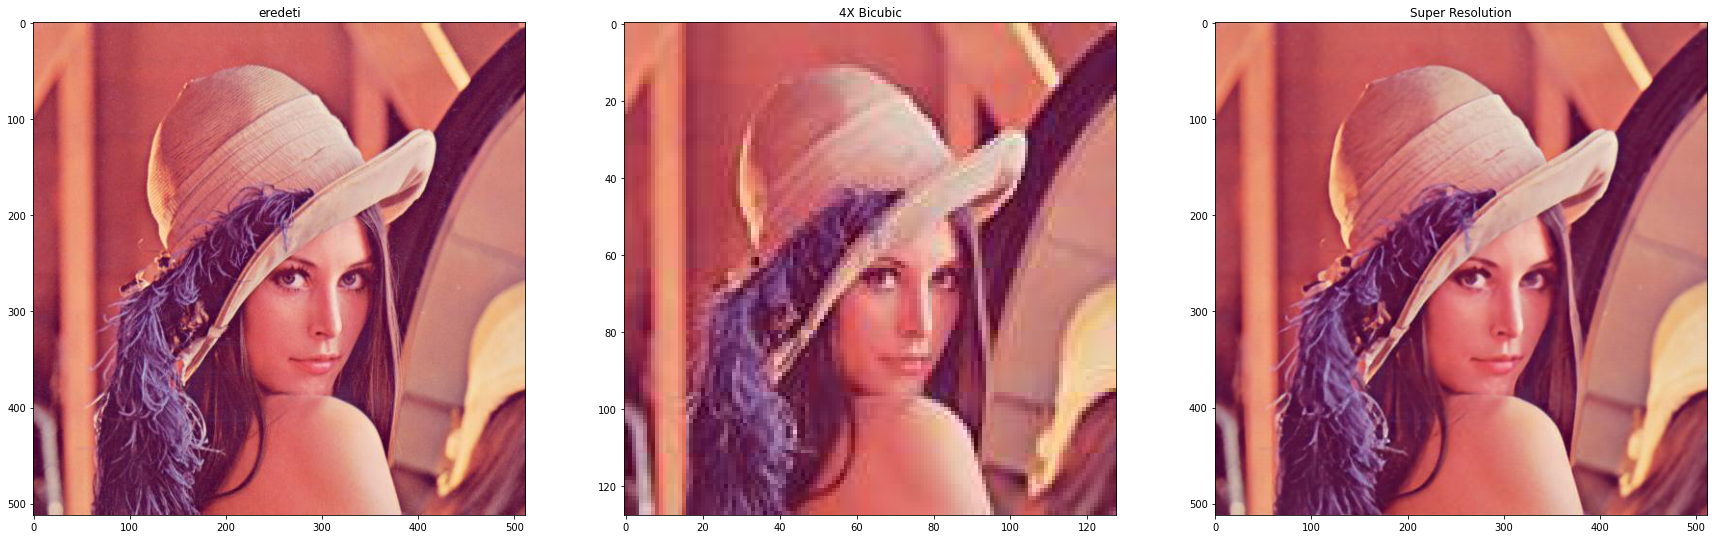

In [46]:
TESThr_image = preprocess_image("Lenna.png")
TESTlr_image = downscale_image(tf.squeeze(TESThr_image))
TESTsr_image = model(TESTlr_image)
TESTsr_image = tf.squeeze(TESTsr_image)
save_image(tf.squeeze(TESThr_image), filename="eredetiTEST")
save_image(tf.squeeze(TESTlr_image), filename="bicubicTEST")
save_image(tf.squeeze(TESTsr_image), filename="superResTEST")
eredetiTEST = mpimg.imread('eredetiTEST.jpg')
bicubicTEST = mpimg.imread('bicubicTEST.jpg')
superResTEST = mpimg.imread('superResTEST.jpg')
#képek összehasonlítása
fig = plt.figure()
fig.set_size_inches(30, 10.5)
ax = fig.add_subplot(1,3,1)
imageplot = plt.imshow(eredetiTEST)
ax.set_title("eredeti")

ax = fig.add_subplot(1,3,2)
imageplot = plt.imshow(bicubicTEST)
ax.set_title("4X Bicubic")

ax = fig.add_subplot(1,3,3)
imageplot = plt.imshow(superResTEST)
ax.set_title("Super Resolution")